<a href="https://colab.research.google.com/github/khaerunnissa/Python/blob/master/Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# agar bisa pakai google drive sebagai tempat penyimpanan data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Matplotlib
Library data visualisasi paling standard di python. Kita mulai dengan visualisasi data satu dimensi berupa python list.

In [2]:
import matplotlib.pyplot as plt

Matplotlib digunakan untuk visualisasi basic, seperti linechart, bar graph, dll.
Seperti lego, pada matplotlib nilai-nilai komponen grafik seperti xlabel, ylabel, title, perlu di definisikan satu-satu melalui code

In [3]:
data = [200,1,1,2,3,5,8,13,21,34,55]

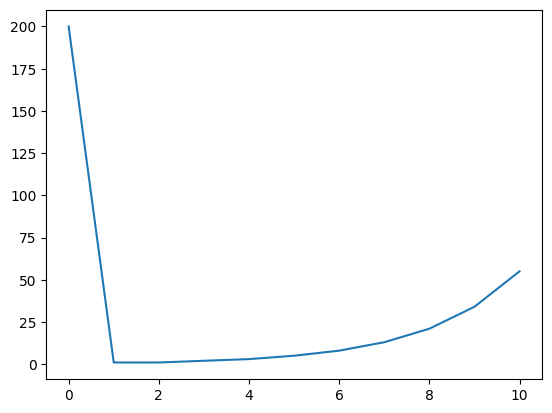

In [4]:
# ini hanya visualisasi grafik saja
plt.plot(data)

TypeError: ignored

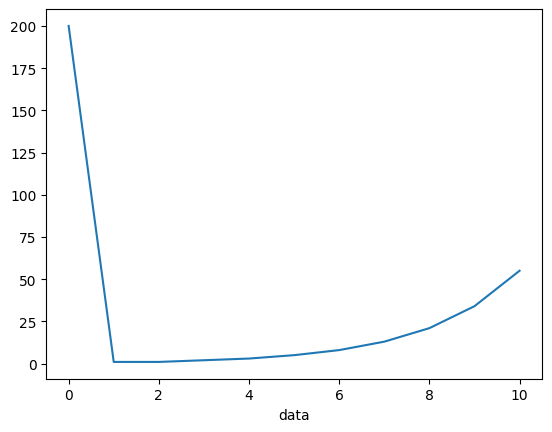

In [5]:
# seringkali kita perlu memberikan konteks informasi, seperti label x axis, label y axis, title.
plt.plot(data)
plt.xlabel("data")
plt.ylabel()
plt.title("Plot data garis")

Contoh lainnya, kita ingin visualisasikan data pada dataframe berikut
baca data iris.csv

In [7]:
df = pd.read_csv("gdrive/MyDrive/data_latihan/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Gunakan scatter plot untuk menampilkan hubungan antara dua variabel

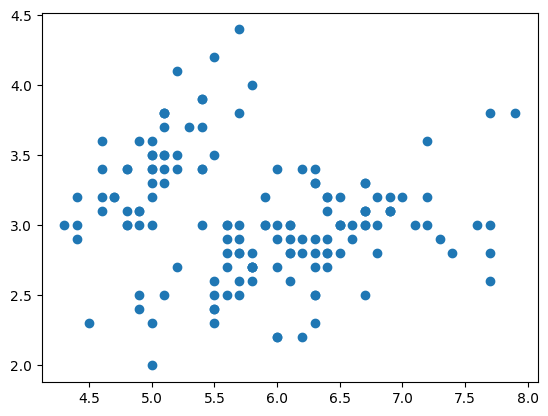

In [8]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"])

Bagaimana jika ingin plot berdasarkan kategori pada kolom "target"?

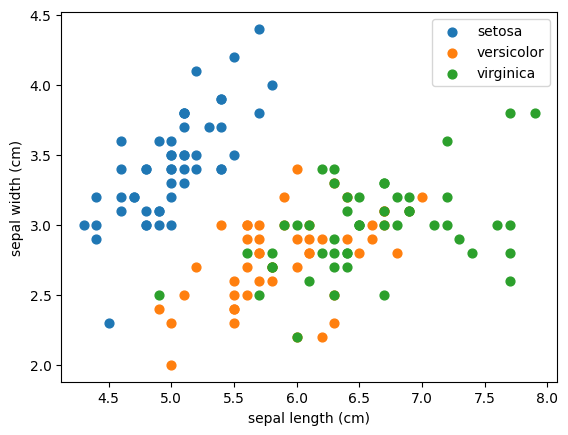

In [10]:



fig, ax = plt.subplots()
for g in df["target"].unique():
  # idenya, iterasi data tiap group target untuk kita plot satu-satu pada kanvas matplotlib
  # filter data menjadi subdata berdasarkan nilai target
  sub_df = df[df["target"]==g]

  # plot subdata pada grafik
  ax.scatter(sub_df["sepal length (cm)"], sub_df["sepal width (cm)"], label = g, s = 40)

ax.legend()
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
plt.show()

# 2. Visualisasi dasar dengan pandas
pandas memiliki metode .plot yang dapat memvisualisasikan data dalam dataframe dengan lebih mudah
referensi penggunaan https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [12]:
df = pd.read_csv("gdrive/MyDrive/data_latihan/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

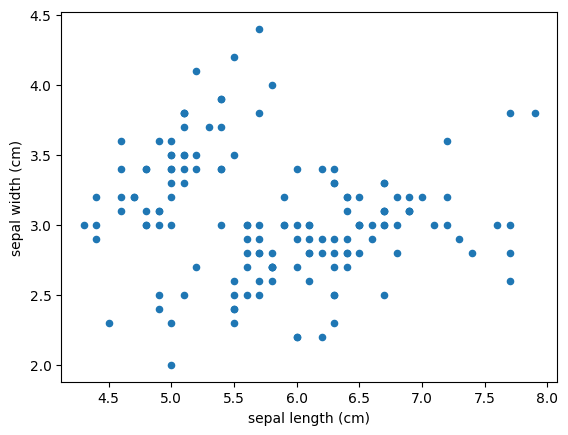

In [13]:
df.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter")

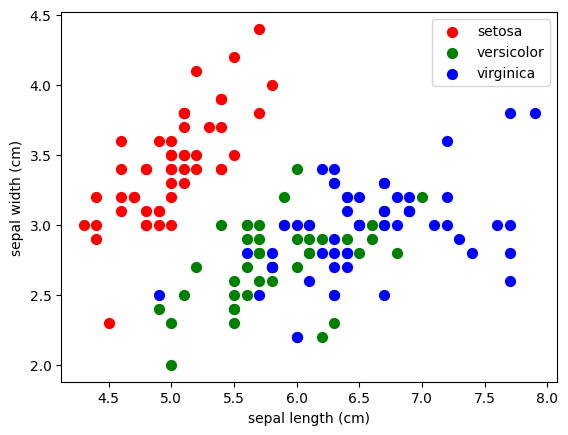

In [14]:
# serupa juga jika ingin plot berdasarkan kategori
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
targets = df["target"].unique()
for target, color in zip(targets, colors):
  sub_df = df[df["target"]==target]
  # argumen c = color
  # s = ukuran titik
  # ax = axis , bisa dibayangkan ini merupakan canvas tempat kita menggambar grafik.
  # kita pastikan kalau setiap plot menggunakan canvas yang sama
  sub_df.plot(x="sepal length (cm)", y="sepal width (cm)", kind="scatter", label=target, ax=ax, c=color, s=50)

Contoh 2 : Histogram

<Axes: ylabel='Frequency'>

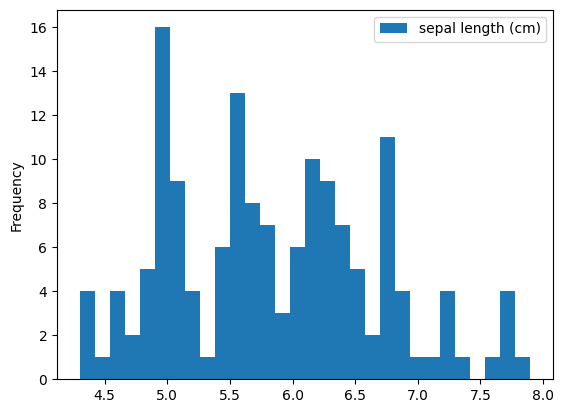

In [15]:
# histogram berlaku pada salah satu kolom saja

df.plot(y="sepal length (cm)", kind="hist", bins=30)

# 3. Seaborn
Seaborn merupakan library visualisasi data statistik yang lebih "user friendly" karena styling, labeling, sudah di buat secara default dan menginginkan user untuk fokus pada data apa yang ingin di plot.
Seaborn juga bekerja dengan sangat baik dengan pandas dataframe. Secara umum sintax plot seaborn adalah sbb:

```
import seaborn as sns

sns.set() # otomatis membuat styling plot

sns.nama_plot(data=<dataframe>, x=, y=)
```

In [16]:
import seaborn as sns
import pandas as pd
sns.set()

## 3.1 Bar graph

In [17]:
df = pd.DataFrame({
    "nama": ["Budi", "Vidi", "Cici"],
    "tinggi": [170, 165, 150]
})
df

,nama,tinggi
0,Budi,170
1,Vidi,165
2,Cici,150


[Text(0.5, 1.0, 'Beda tinggi orang')]

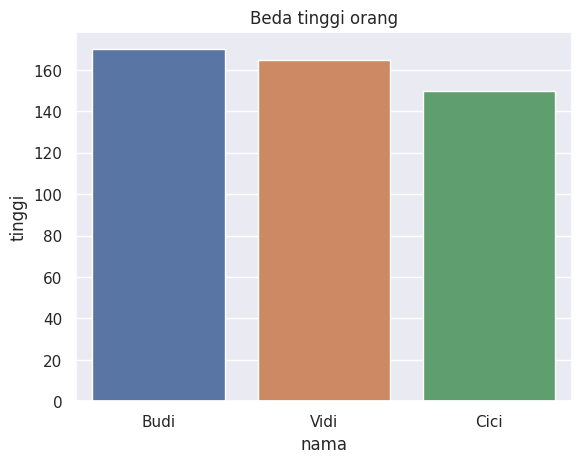

In [18]:
# presentasikan pada bar graph
sns.barplot(data=df, x="nama", y="tinggi").set(title="Beda tinggi orang")

## 3.2 Scatter plot

In [20]:
df = pd.read_csv("gdrive/MyDrive/data_latihan/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

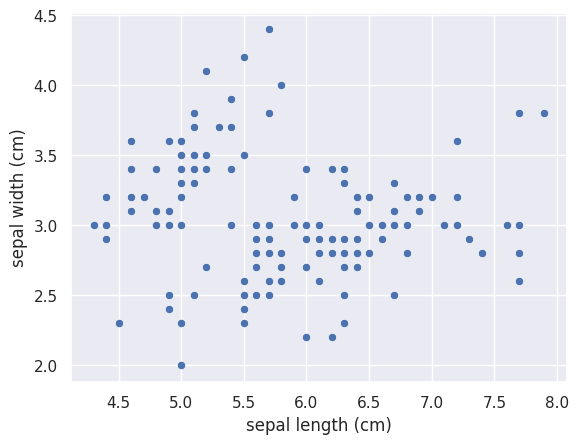

In [21]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)")

[Text(0.5, 1.0, 'scatter plot pada data iris')]

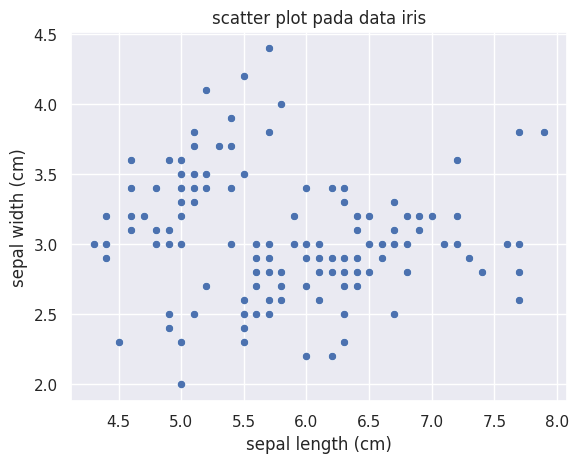

In [22]:
# menambahkan attribute seperti chart title, dengan menggunakan metode .set
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)").set(title="scatter plot pada data iris")

[Text(0.5, 1.0, 'scatter plot pada data iris')]

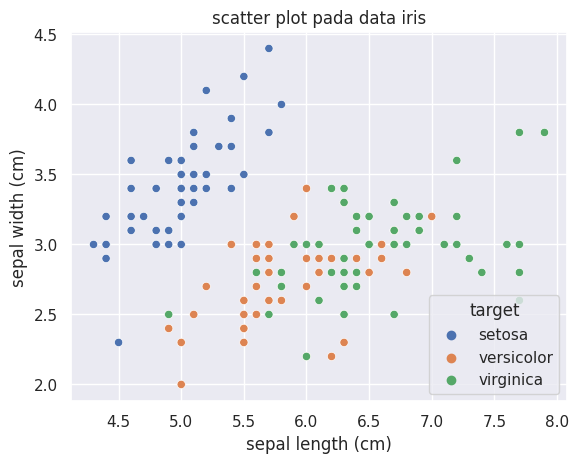

In [23]:
# jika ingin plot berdasarkan target, tinggal masukkan pada argumen `hue`
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target")\
.set(title="scatter plot pada data iris")


## 3.3 Histogram

In [25]:
df = pd.read_csv("gdrive/MyDrive/data_latihan/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Histogram salah satu kolom

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

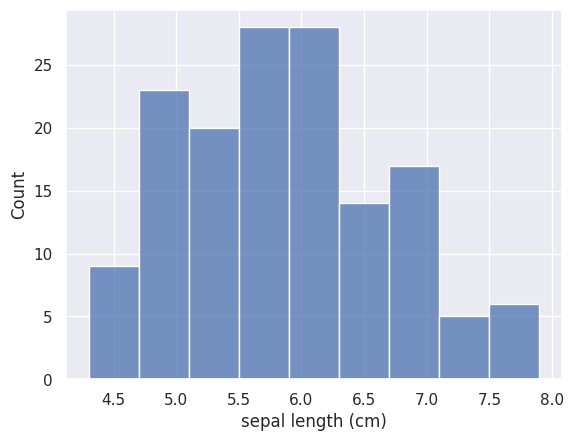

In [26]:
sns.histplot(data=df, x="sepal length (cm)")

Histogram salah satu kolom (sepal length (cm) per-target

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

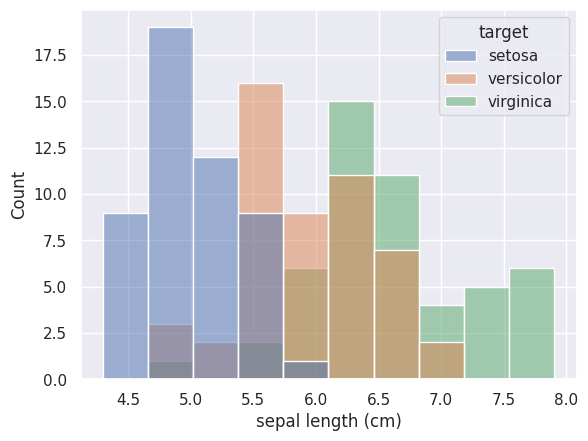

In [27]:
# hue untuk plot kategori berdasarkan warna
# bins menentukan jumlah bins pada histogram
sns.histplot(data=df, x="sepal length (cm)", hue="target", bins=10)

## 3.4 Line plot


In [28]:
df = pd.DataFrame({
    "penjualan": [10,10,20,31,53,85],
    "tahun": range(2017,2023)
})
df.head()

,penjualan,tahun
0,10,2017
1,10,2018
2,20,2019
3,31,2020
4,53,2021


<Axes: xlabel='tahun', ylabel='penjualan'>

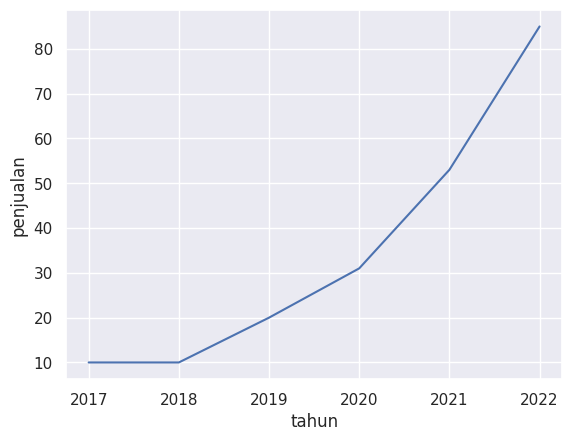

In [29]:
sns.lineplot(data=df, y="penjualan", x="tahun")

## 3.5 Boxplot

In [31]:
df = pd.read_csv("gdrive/MyDrive/data_latihan/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='target', ylabel='sepal length (cm)'>

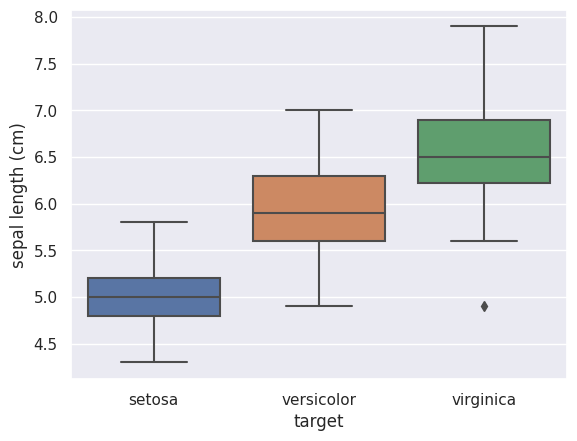

In [32]:
sns.boxplot(data=df, x="target", y="sepal length (cm)")

Contoh lain dapat di lihat di gallery seaborn : https://seaborn.pydata.org/examples/

In [33]:
nilai_random = np.random.random(1000)

In [34]:
index_data_rentang46 = []
for i, data in enumerate(nilai_random):
  if 0.4<data<0.6:
    index_data_rentang46.append(i)

In [35]:
nilai_random[697]

0.24005539946471866

In [36]:
index_data_rentang46

[0,
 11,
 19,
 26,
 32,
 38,
 45,
 55,
 56,
 61,
 76,
 85,
 93,
 96,
 100,
 109,
 110,
 111,
 119,
 120,
 126,
 128,
 132,
 137,
 142,
 143,
 144,
 172,
 178,
 186,
 192,
 195,
 198,
 201,
 202,
 203,
 204,
 206,
 211,
 212,
 222,
 231,
 236,
 239,
 253,
 255,
 260,
 262,
 268,
 271,
 275,
 298,
 304,
 311,
 317,
 320,
 324,
 325,
 332,
 344,
 348,
 349,
 355,
 365,
 366,
 369,
 371,
 374,
 377,
 385,
 399,
 400,
 404,
 407,
 415,
 421,
 423,
 427,
 433,
 442,
 448,
 462,
 480,
 482,
 483,
 487,
 489,
 494,
 501,
 503,
 504,
 507,
 513,
 514,
 519,
 526,
 527,
 535,
 538,
 540,
 541,
 546,
 552,
 561,
 562,
 563,
 566,
 574,
 579,
 586,
 589,
 596,
 607,
 618,
 622,
 630,
 636,
 649,
 651,
 659,
 669,
 672,
 675,
 676,
 681,
 688,
 689,
 692,
 693,
 696,
 703,
 711,
 723,
 724,
 725,
 726,
 727,
 732,
 733,
 734,
 738,
 743,
 749,
 763,
 768,
 770,
 773,
 775,
 782,
 783,
 787,
 792,
 795,
 797,
 798,
 809,
 820,
 829,
 830,
 832,
 833,
 837,
 856,
 857,
 858,
 862,
 865,
 872,
 873,
 

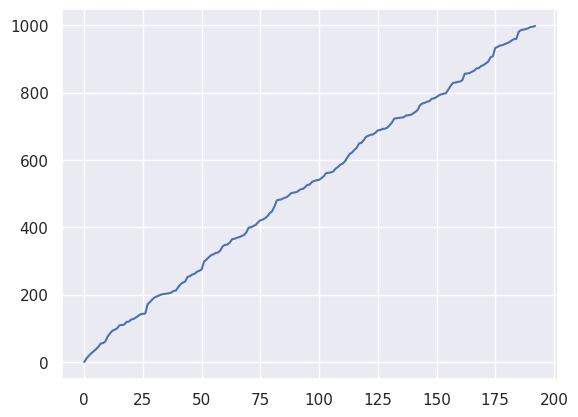

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
plt.plot(index_data_rentang46)
plt.show()